<h2>Bag of words</h2>

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [2]:
import pickle
with open('train_bow.pickle', 'rb') as f:
    x_bow=pickle.load(f)
with open('test_bow.pickle','rb') as f:
    test_bow=pickle.load(f)

In [3]:
#loading y_train and y_test dataset
with open('y_train.pickle', 'rb') as f:
    y_bow=pickle.load(f)
with open('y_test.pickle','rb') as f:
    y_test=pickle.load(f)

In [4]:
x_bow=normalize(x_bow,axis=0)
test_bow=normalize(test_bow,axis=0)

In [5]:
x_train,x_cv , y_train, y_cv = train_test_split(x_bow, y_bow, test_size=0.2, random_state=42)

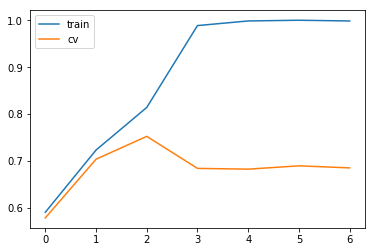

In [7]:
import numpy as np
from sklearn import tree
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
depths=[1, 5, 10, 50, 100, 500, 100]
for i in depths:
    clf=tree.DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(x_train, y_train)
    y_hat = clf.predict_proba(x_train)[:,1]
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.predict_proba(x_cv)[:,1]
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.plot(cv_metric, label="cv")
plt.legend()
plt.show()

<h4><b>Observation:</h4><br>From max depth=10 the cv metric starts to overfit hence optimal max depth=10

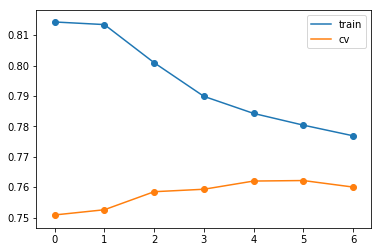

In [8]:
min_samples_split_set= [5, 10,100,500,1000,2000,3000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=i, class_weight='balanced')
    clf.fit(x_train, y_train)
    y_hat = clf.predict_proba(x_train)[:,1]
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.predict_proba(x_cv)[:,1]
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6],cv_metric)
plt.legend()
plt.show()

In [9]:
#Observation:From min_samples_split=10 the cv metric starts to overfit hence optimal min_samples_split=2000
#Hence max_depth=10 and min_samples_split=2000 are best hyperparameters

In [31]:
#on test dataset with max_depth=10 and min_samples_split=2000
from sklearn.metrics import roc_auc_score
clf=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=2000,class_weight='balanced')
clf.fit(x_bow,y_bow)
pred=clf.predict(test_bow)
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

72.10428098320632 %
[[ 2983   691]
 [ 6562 11181]]


Text(0.5,1,'Confusion Matrix\n')

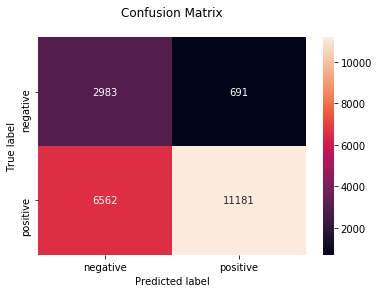

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

In [8]:
#feature importance
with open('bow_features.pickle','rb') as f:
    bow_features=pickle.load(f)

In [9]:
prob=clf.feature_importances_

In [10]:
a=np.argsort(-1*prob)
b=a[0:20]

In [11]:
for i in b:
    print(bow_features[i])

disappoint
return
great
worst
love
wast
bad
best
delici
good
thought
horribl
china
refund
yuck
unfortun
aw
review
stale
overpr


In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_split=2000)
clf = clf.fit(x_bow,y_bow)

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2,feature_names=bow_features) 
bow_graph = graphviz.Source(dot_data) 
bow_graph.render("bow_tree") 

'bow_tree.pdf'

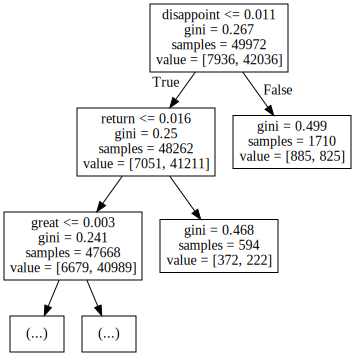

In [14]:
bow_graph

<h1>With TFIDF</h2>

In [15]:
import pickle
with open('train_tfidf.pickle', 'rb') as f:
    x_tfidf=pickle.load(f)
with open('test_tfidf.pickle','rb') as f:
    test_tfidf=pickle.load(f)

In [16]:
import pickle
with open('y_train_tfidf.pickle', 'rb') as f:
    y_tfidf=pickle.load(f)
with open('y_test_tfidf.pickle','rb') as f:
    y_test_tfidf=pickle.load(f)

In [17]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_tfidf = normalize(x_tfidf, axis=0)
test_tfidf = normalize(test_tfidf, axis=0)

In [18]:
x_train_tfidf,x_cv_tfidf , y_train_tfidf, y_cv_tfidf = train_test_split(x_tfidf, y_tfidf, test_size=0.2, random_state=42)

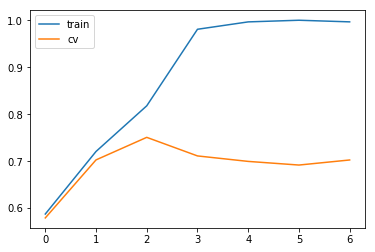

In [58]:
import numpy as np
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
depths=[1, 5, 10, 50, 100, 500, 100]
for i in depths:
    clf=tree.DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.predict_proba(x_train_tfidf)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.plot(cv_metric, label="cv")
plt.legend()
plt.show()

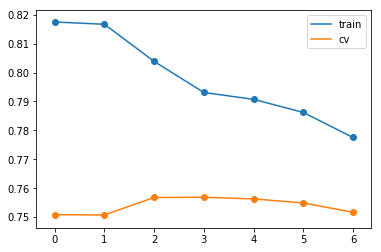

In [31]:
min_samples_split_set= [5, 10,100,500,1000,2000,3000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=i, class_weight='balanced')
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.predict_proba(x_train_tfidf)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6],cv_metric)
plt.legend()
plt.show()

In [32]:
#on test dataset with max_depth=10 and min_samples_split=100
clf=tree.DecisionTreeClassifier(max_depth=10,min_samples_split=100,class_weight='balanced')
clf.fit(x_tfidf,y_tfidf)
pred=clf.predict(test_tfidf)
f1_score=roc_auc_score(y_test_tfidf, pred) * float(100)
print(f1_score,"%")
conf_matrix = confusion_matrix(y_test_tfidf, pred)
print(conf_matrix)

73.0188526739566 %
[[ 2763   911]
 [ 5175 12568]]


Text(0.5,1,'Confusion Matrix\n')

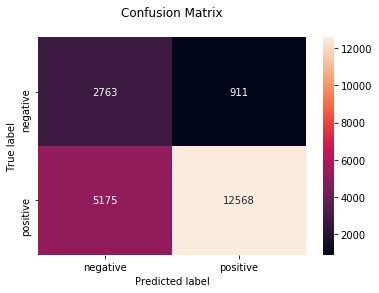

In [33]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_split=100)
clf = clf.fit(x_tfidf,y_tfidf)

In [20]:
with open('tfidf_features.pickle','rb') as f:
    tfidf_features=pickle.load(f)

In [21]:
prob=clf.feature_importances_

In [22]:
a=np.argsort(-1*prob)
b=a[0:20]

In [23]:
for i in b:
    print(tfidf_features[i])

disappoint
return
great
worst
love
wast money
bad
best
delici
threw
wont disappoint
horribl
stale
thought
made china
high recommend
never disappoint
unfortun
mayb
nice


In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2,feature_names=tfidf_features) 
tfidf_graph = graphviz.Source(dot_data) 
tfidf_graph.render("tfidf_tree") 

'tfidf_tree.pdf'

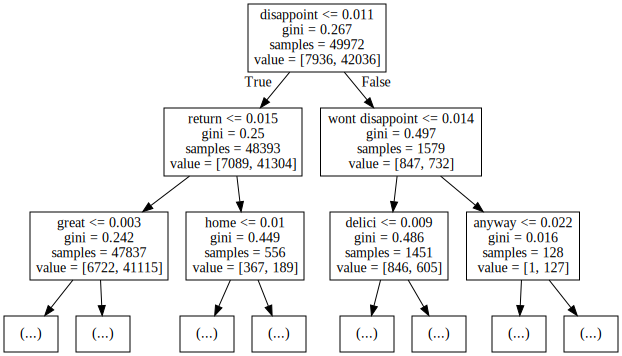

In [26]:
tfidf_graph

<h2>With avg word2vec</h2>

In [50]:
import pickle
with open('train_avgw2v.pickle', 'rb') as f:
    x_avgw2v=pickle.load(f)
with open('test_avgw2v.pickle','rb') as f:
    test_avgw2v=pickle.load(f)

In [51]:
#loading y_train and y_test dataset
with open('y_train_avgw2v.pickle', 'rb') as f:
    y_avgw2v=pickle.load(f)
with open('y_test_avgw2v.pickle','rb') as f:
    y_test_avgw2v=pickle.load(f)

In [54]:
x_avgw2v=normalize(x_avgw2v,axis=0)
test_avgw2v=normalize(test_avgw2v,axis=0)

In [55]:
x_train_avgw2v,x_cv_avgw2v, y_train_avgw2v, y_cv_avgw2v = train_test_split(x_avgw2v,y_avgw2v, test_size=0.2, random_state=42)

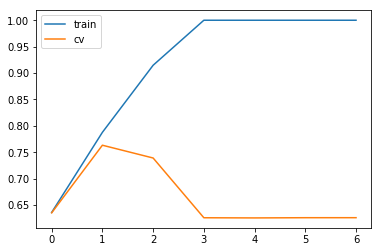

In [56]:
import numpy as np
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
depths=[1, 5, 10, 50, 100, 500, 100]
for i in depths:
    clf=tree.DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.predict_proba(x_train_avgw2v)[:,1]
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.predict_proba(x_cv_avgw2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.plot(cv_metric, label="cv")
plt.legend()
plt.show()

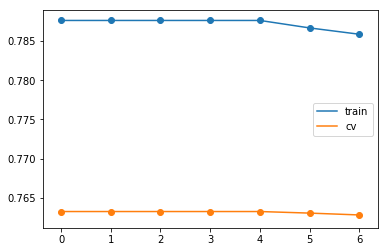

In [63]:
min_samples_split_set= [2,3,5, 10,100,500,1000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf=tree.DecisionTreeClassifier(max_depth=5,min_samples_split=i, class_weight='balanced')
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.predict_proba(x_train_avgw2v)[:,1]
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.predict_proba(x_cv_avgw2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6],cv_metric)
plt.legend()
plt.show()

In [66]:
#on test dataset with max_depth=5 and min_samples_split=100
clf=tree.DecisionTreeClassifier(max_depth=5,min_samples_split=100,class_weight='balanced')
clf.fit(x_avgw2v,y_avgw2v)
pred=clf.predict(test_avgw2v)
f1_score=roc_auc_score(y_test_avgw2v, pred) * float(100)
print(f1_score,"%")
conf_matrix = confusion_matrix(y_test_avgw2v, pred)
print(conf_matrix)

69.43063655701617 %
[[ 2800   874]
 [ 6627 11116]]


Text(0.5,1,'Confusion Matrix\n')

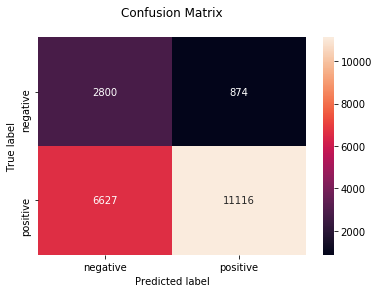

In [67]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_split=2000)
clf = clf.fit(X_train,y_train_bow)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2,feature_names=bow_features) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

In [ ]:
graph

<h2>TF-IDF Weighted word2vec</h2>

In [7]:
import pickle
with open('x_train_tfidf_w2v.pickle', 'rb') as f:
    train_tfidf_w2v=pickle.load(f)
with open('x_test_tfidf_w2v.pickle','rb') as f:
    test_tfidf_w2v=pickle.load(f)

In [8]:
import pickle
with open('y_train_tfidf_w2v.pickle', 'rb') as f:
    y_train=pickle.load(f)
with open('y_test_tfidf_w2v.pickle','rb') as f:
    y_test=pickle.load(f)

In [9]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_train_tfidf_w2v = normalize(x_train_tfidf_w2v, axis=0)
x_test_tfidf_w2v = normalize(x_test_tfidf_w2v, axis=0)

In [10]:
from sklearn.model_selection import train_test_split
x_train_tfidf_w2v,x_cv_tfidf_w2v , y_train_tfidf_w2v, y_cv_tfidf_w2v = train_test_split(train_tfidf_w2v, y_train, test_size=0.2, random_state=42)

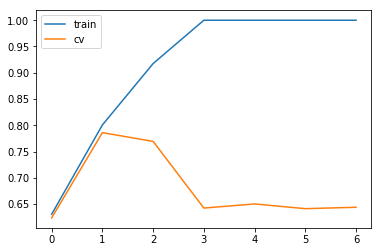

In [12]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import tree
train_metric = []
cv_metric= []
depths=[1, 5, 10, 50, 100, 500, 100]
for i in depths:
    clf=tree.DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.predict_proba(x_train_tfidf_w2v)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf_w2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.plot(cv_metric, label="cv")
plt.legend()
plt.show()

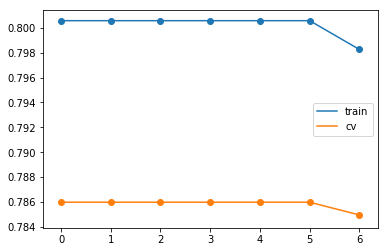

In [13]:
min_samples_split_set= [2,3,5, 10,100,500,1000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf=tree.DecisionTreeClassifier(max_depth=5,min_samples_split=i, class_weight='balanced')
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.predict_proba(x_train_tfidf_w2v)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf_w2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6],cv_metric)
plt.legend()
plt.show()

In [14]:
#on test dataset with max_depth=5 and min_samples_split=500
clf=tree.DecisionTreeClassifier(max_depth=5,min_samples_split=500,class_weight='balanced')
clf.fit(train_tfidf_w2v,y_train)
pred=clf.predict(test_tfidf_w2v)
f1_score=roc_auc_score(y_test, pred) * float(100)
print(f1_score,"%")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

71.12159607062935 %
[[1637  726]
 [3221 8694]]


Text(0.5,1,'Confusion Matrix\n')

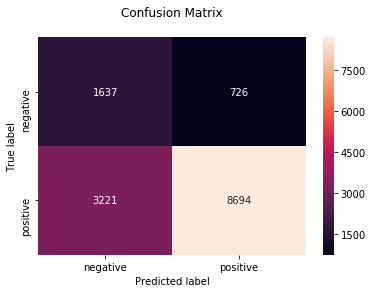

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

In [36]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["  ", "max_depth", "min_samples_split", "roc_auc_score"]
x.add_row(["BOW", 10, 2000, "72.10%"])
x.add_row(["TFIDF", 10, 100, "73.01%"])
x.add_row(["Avgw2v", 5, 100," 69.43%"])
x.add_row(["TFIDF W2V", 5, 500, "71.12%"])
print(x)

+-----------+-----------+-------------------+---------------+
|           | max_depth | min_samples_split | roc_auc_score |
+-----------+-----------+-------------------+---------------+
|    BOW    |     10    |        2000       |     72.10%    |
|   TFIDF   |     10    |        100        |     73.01%    |
|   Avgw2v  |     5     |        100        |     69.43%    |
| TFIDF W2V |     5     |        500        |     71.12%    |
+-----------+-----------+-------------------+---------------+
